In [1]:
import sys
sys.path.append("./DIS/IS-Net")
import os
import time
import numpy as np
from skimage import io
import time
from glob import glob
from tqdm import tqdm

import torch, gc
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from torchvision.transforms.functional import normalize

from models import *

/home/wg25r/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [2]:
model = ISNetDIS()
model.load_state_dict(torch.load("/home/wg25r/isnet-general-use.pth"))
# model.conv_in = nn.Conv2d(9, 64, kernel_size=(3,3), stride=(2,2), padding=(1,1))

/tmp/ipykernel_3136359/1067176229.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/wg25r/isnet-general-use.pth"))


<All keys matched successfully>

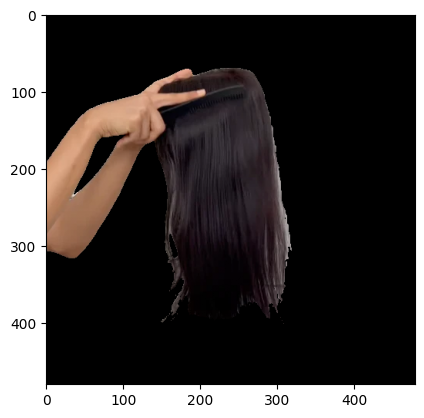

In [7]:
import cv2
import pylab
img = cv2.imread("image copy 2.png") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
img2 = normalize(torch.tensor(img).permute(2,0,1), [0.5, 0.5, 0.5], [1, 1, 1]).to(torch.float32).unsqueeze(0)
mask = model(img2)[0][0][0][0].detach().numpy()>0.8
mask = mask[:,:,None].repeat(3, axis=2)
# selected = np.where(mask, img, 0)
selected = img*mask
pylab.imshow(selected)

In [4]:
model(img2)[0][0][0][0].detach().numpy().shape, img.shape, img[model(img2)[0][0][0][0].detach().numpy()>0.5].shape

((480, 479), (480, 479, 3), (68966, 3))